In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [164]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline # 자동화 
from sklearn.pipeline import make_pipeline # 자동화 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = load_breast_cancer()

In [7]:
type(cancer)

sklearn.utils.Bunch

In [10]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
data = pd.DataFrame(cancer.data)

In [14]:
data

0      1       2       3        4        5         6         7   \
0    17.990  10.38  122.80  1001.0  0.11840  0.27760  0.300100  0.147100   
1    20.570  17.77  132.90  1326.0  0.08474  0.07864  0.086900  0.070170   
2    19.690  21.25  130.00  1203.0  0.10960  0.15990  0.197400  0.127900   
3    11.420  20.38   77.58   386.1  0.14250  0.28390  0.241400  0.105200   
4    20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000  0.104300   
5    12.450  15.70   82.57   477.1  0.12780  0.17000  0.157800  0.080890   
6    18.250  19.98  119.60  1040.0  0.09463  0.10900  0.112700  0.074000   
7    13.710  20.83   90.20   577.9  0.11890  0.16450  0.093660  0.059850   
8    13.000  21.82   87.50   519.8  0.12730  0.19320  0.185900  0.093530   
9    12.460  24.04   83.97   475.9  0.11860  0.23960  0.227300  0.085430   
10   16.020  23.24  102.70   797.8  0.08206  0.06669  0.032990  0.033230   
11   15.780  17.89  103.60   781.0  0.09710  0.12920  0.099540  0.066060   
12   19.170  24.80  132.40  1123.0  0.09740  0.24580  0.206500  0.111800   
13   15.850  23.95  103.70   782.7  0.08401  0.10020  0.099380  0.053640   
14   13.730  22.61   93.60   578.3  0.11310  0.22930  0.212800  0.080250   
15   14.540  27.54   96.73   658.8  0.11390  0.15950  0.163900  0.073640   
16   14.680  20.13   94.74   684.5  0.09867  0.07200  0.073950  0.052590   
17   16.130  20.68  108.10   798.8  0.11700  0.20220  0.172200  0.102800   
18   19.810  22.15  130.00  1260.0  0.09831  0.10270  0.147900  0.094980   
19   13.540  14.36   87.46   566.3  0.09779  0.08129  0.066640  0.047810   
20   13.080  15.71   85.63   520.0  0.10750  0.12700  0.045680  0.031100   
21    9.504  12.44   60.34   273.9  0.10240  0.06492  0.029560  0.020760   
22   15.340  14.26  102.50   704.4  0.10730  0.21350  0.207700  0.097560   
23   21.160  23.04  137.20  1404.0  0.09428  0.10220  0.109700  0.086320   
24   16.650  21.38  110.00   904.6  0.11210  0.14570  0.152500  0.091700   
25   17.140  16.40  116.00   912.7  0.11860  0.22760  0.222900  0.140100   
26   14.580  21.53   97.41   644.8  0.10540  0.18680  0.142500  0.087830   
27   18.610  20.25  122.10  1094.0  0.09440  0.10660  0.149000  0.077310   
28   15.300  25.27  102.40   732.4  0.10820  0.16970  0.168300  0.087510   
29   17.570  15.05  115.00   955.1  0.09847  0.11570  0.098750  0.079530   
..      ...    ...     ...     ...      ...      ...       ...       ...   
539   7.691  25.44   48.34   170.4  0.08668  0.11990  0.092520  0.013640   
540  11.540  14.44   74.65   402.9  0.09984  0.11200  0.067370  0.025940   
541  14.470  24.99   95.81   656.4  0.08837  0.12300  0.100900  0.038900   
542  14.740  25.42   94.70   668.6  0.08275  0.07214  0.041050  0.030270   
543  13.210  28.06   84.88   538.4  0.08671  0.06877  0.029870  0.032750   
544  13.870  20.70   89.77   584.8  0.09578  0.10180  0.036880  0.023690   
545  13.620  23.23   87.19   573.2  0.09246  0.06747  0.029740  0.024430   
546  10.320  16.35   65.31   324.9  0.09434  0.04994  0.010120  0.005495   
547  10.260  16.58   65.85   320.8  0.08877  0.08066  0.043580  0.024380   
548   9.683  19.34   61.05   285.7  0.08491  0.05030  0.023370  0.009615   
549  10.820  24.21   68.89   361.6  0.08192  0.06602  0.015480  0.008160   
550  10.860  21.48   68.51   360.5  0.07431  0.04227  0.000000  0.000000   
551  11.130  22.44   71.49   378.4  0.09566  0.08194  0.048240  0.022570   
552  12.770  29.43   81.35   507.9  0.08276  0.04234  0.019970  0.014990   
553   9.333  21.94   59.01   264.0  0.09240  0.05605  0.039960  0.012820   
554  12.880  28.92   82.50   514.3  0.08123  0.05824  0.061950  0.023430   
555  10.290  27.61   65.67   321.4  0.09030  0.07658  0.059990  0.027380   
556  10.160  19.59   64.73   311.7  0.10030  0.07504  0.005025  0.011160   
557   9.423  27.88   59.26   271.3  0.08123  0.04971  0.000000  0.000000   
558  14.590  22.68   96.39   657.1  0.08473  0.13300  0.102900  0.037360   
559  11.510  23.93   74.52   403.5  0.09261  0.10210  0.1

In [18]:
data_y = pd.DataFrame(cancer.target,columns=['target'])

In [20]:
data_pd = pd.concat([data,data_y],axis=1)

/Users/jung-kyoyoon/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jung-kyoyoon/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


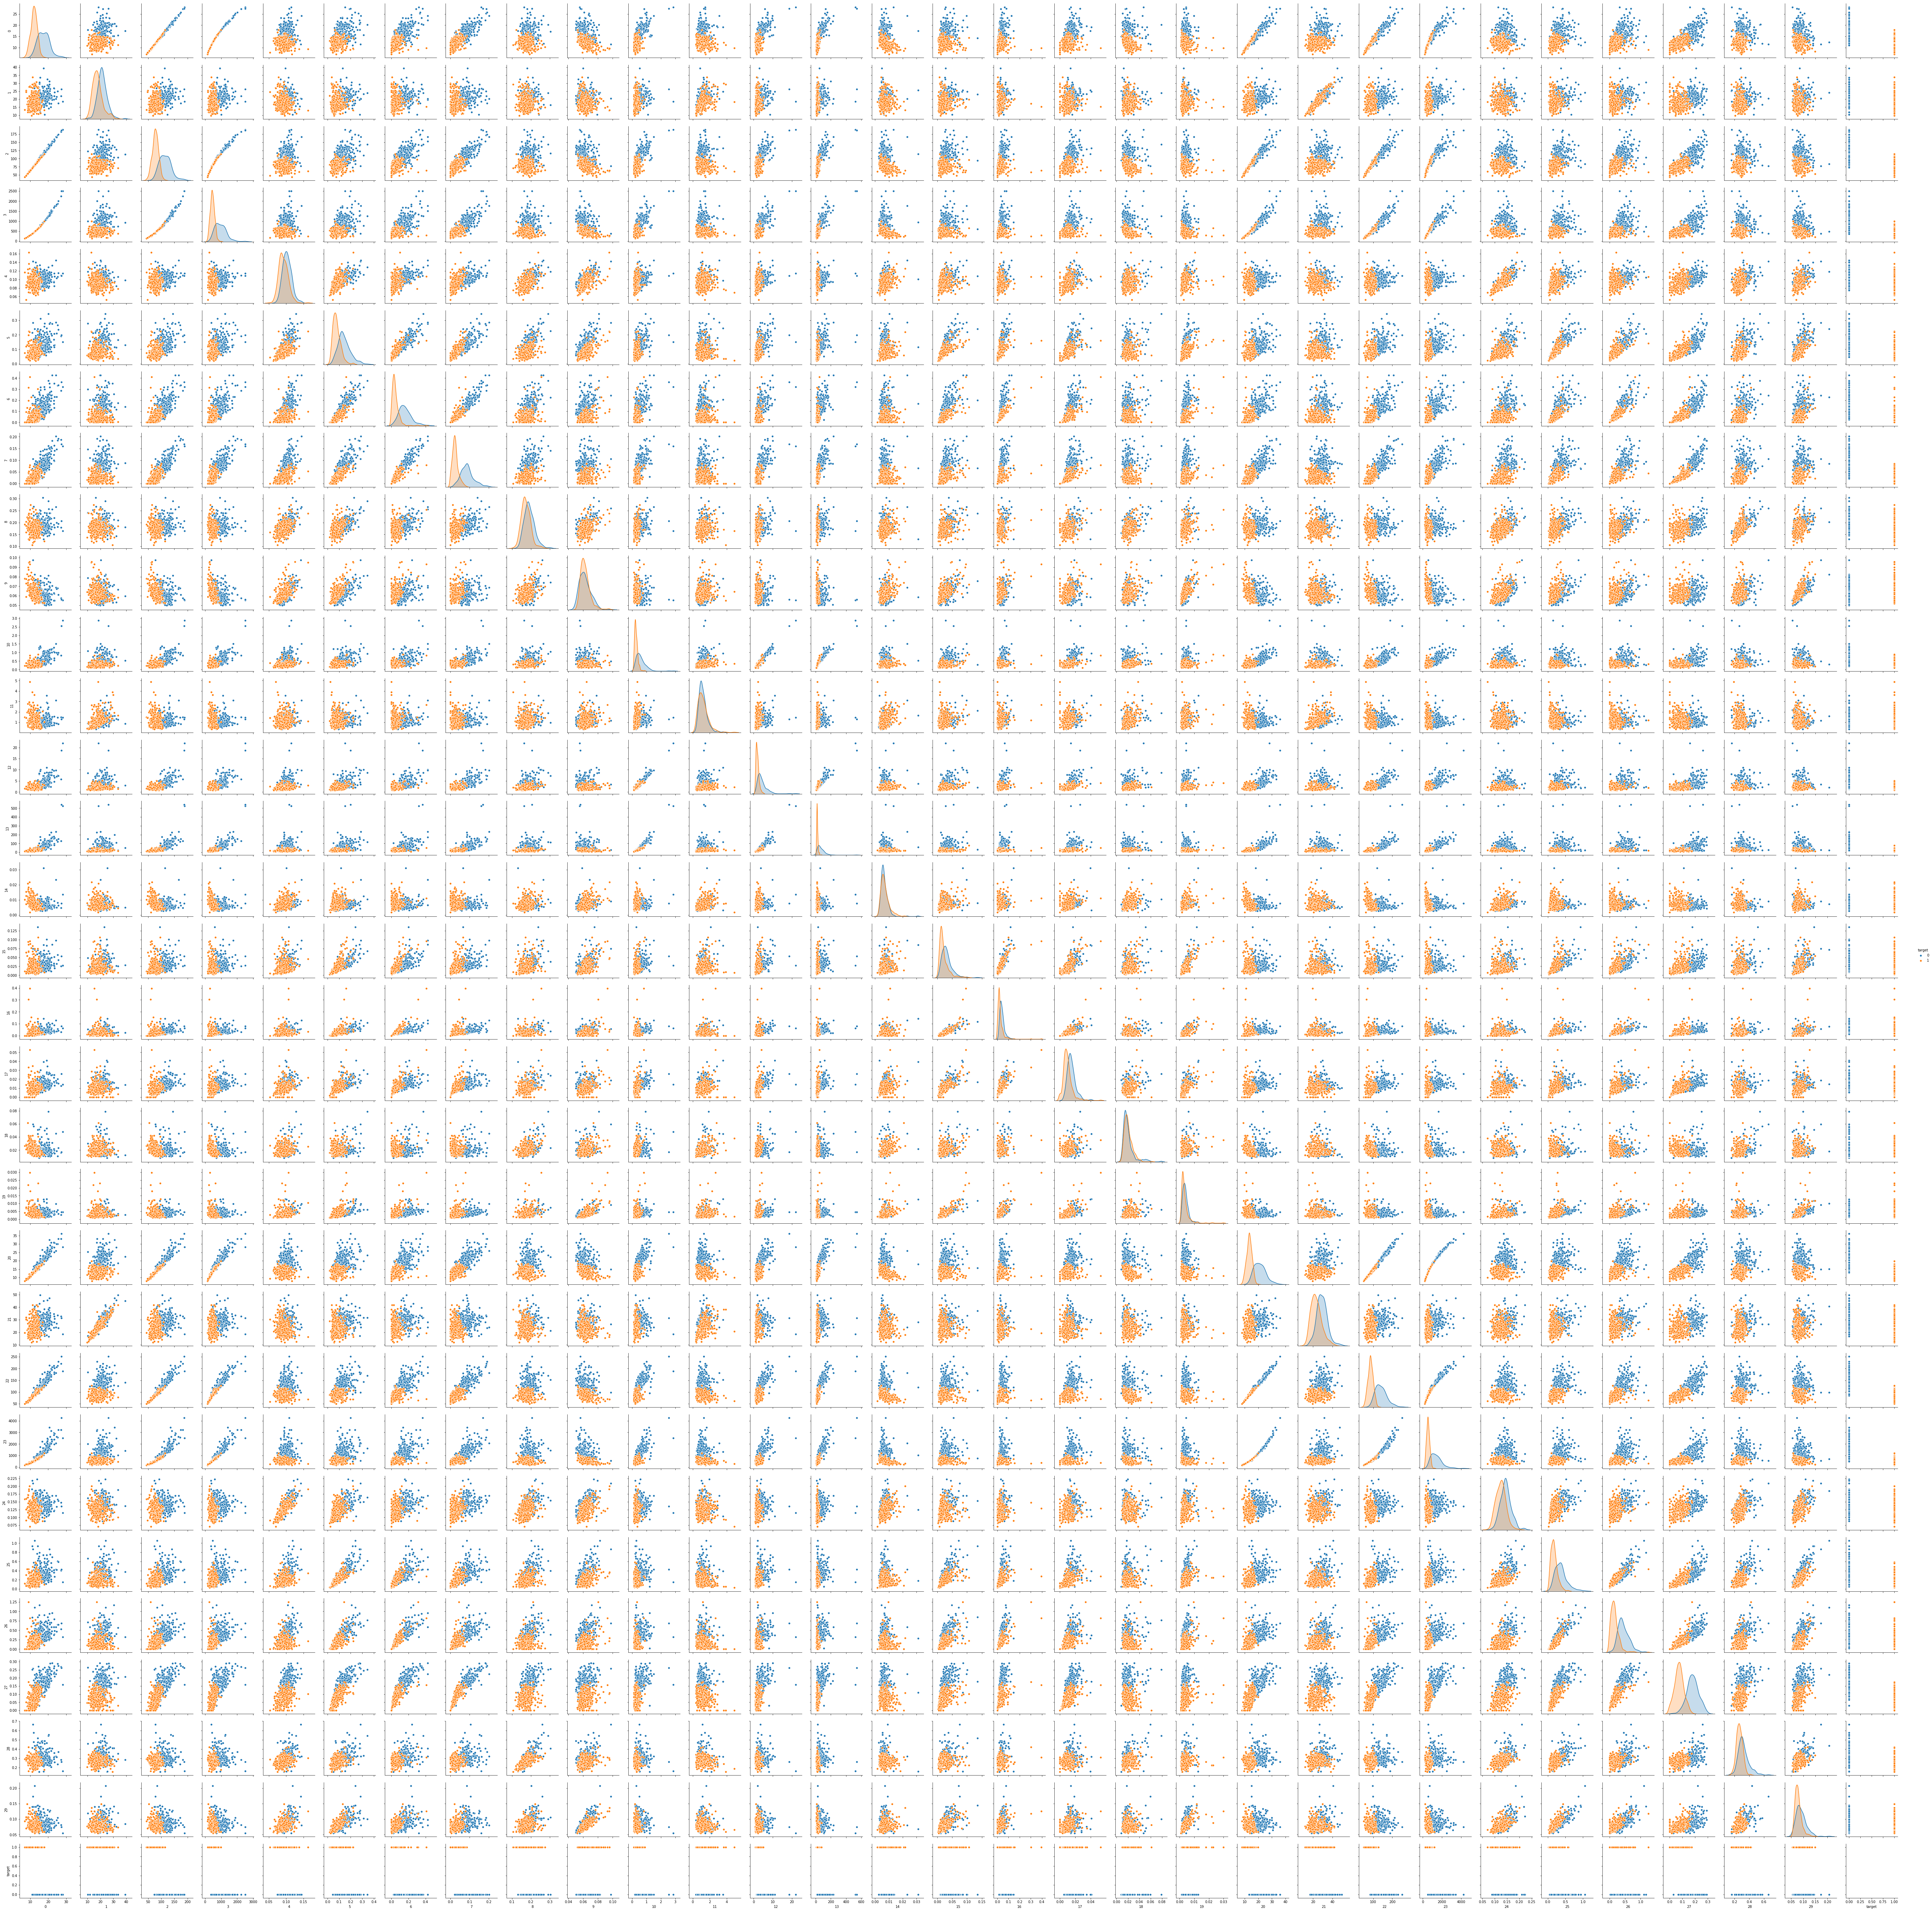

In [21]:
sns.pairplot(data_pd,hue='target')

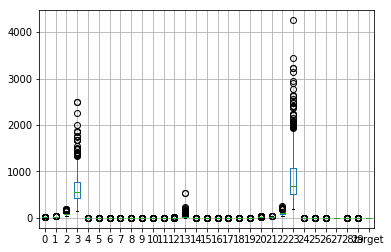

In [37]:
data_pd.boxplot() # accuracy 는 문제가 없는데 outlier들이 문제가 될 수가 있어서 이에 대해 feature scaling을 통해 조정을 해야 된다.

In [40]:
knn = KNeighborsClassifier()

In [42]:
t = cross_val_score(knn,data_pd.iloc[:,:-1],data_pd.iloc[:,-1],cv=10) # accuracy 대충의 성능 평가 목적 

In [43]:
np.mean(t)

0.9298429262812202

In [44]:
np.std(t)

0.028921039975408073

In [ ]:
# Accuracy 만 가지고 판단하기 어려울 때 
# cross_validate # 19.0 부터 새로 생긴 라이브러리 
# cross_val_predict

In [48]:
# 0과 1사이의 값으로 표준화하는 scaler (평균이 0, 표준편차는 1로 바꾸어줌)
# 1. MinMaxScaler -> X - min / max - min
# 2. Normalizer -> Z = X - m / omega

In [ ]:
# Regularization -> model이 overfitting하는 것을 막기 위해 가중치를 주는 기법 (딥러닝)

In [49]:
minmaxScaler = MinMaxScaler()

In [50]:
minmaxScaler.fit_transform(data_pd.iloc[:,:-1])

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [51]:
data_pd.iloc[:,:-1] = minmaxScaler.fit_transform(data_pd.iloc[:,:-1]) # feature scaling 

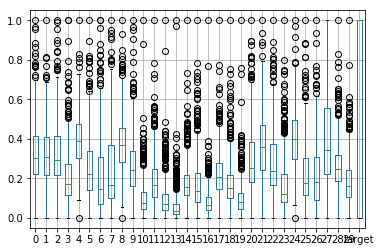

In [52]:
data_pd.boxplot()

In [54]:
t = cross_val_score(knn,data_pd.iloc[:,:-1],data_pd.iloc[:,-1],cv=10)

In [56]:
np.mean(t) # outlier (동그라미들)들이 악영향을 미치고 있었다는 게 밝혀짐 

0.9666925935528476

In [57]:
np.std(t)

0.0226906093742805

In [ ]:
# grid search cv -> param_grid 만 정해주면 parameter 찾아줌 

In [60]:
# {'n_neighbors':[x for x in range(1,20)]}, cv=10
gscv = GridSearchCV(knn, param_grid={'n_neighbors':[x for x in range(1,20)]},cv=10)

In [61]:
gscv.fit(data_pd.iloc[:,:-1],data_pd.iloc[:,-1])

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
gscv.best_params_

{'n_neighbors': 14}

In [63]:
gscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [64]:
gscv.best_index_

13

In [65]:
gscv.best_score_

0.9736379613356766

In [ ]:
# featrure scaling 은 학습할 때도 scaling을 해야 되고 예측할 때도 scailing을 해야 되는 게 문제이다.
# test할 때도 scaler를 넣어야 한다. 
# 위에서 실수를 많이 하기 때문에 pipeline을 써서 자동화한다. 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data_pd.iloc[:,:-1],data_pd.iloc[:,-1])

In [96]:
pipeline = Pipeline([("scaler",MinMaxScaler()),("knn",KNeighborsClassifier())])

In [97]:
pipeline.fit(X_train,y_train) # fit -> predict (최종 예측) or score (대충의 성능 확인) 
# (cross_val 한 fit은 아니다. -> cross_val or CV 가 있어야 하는데 없다.)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [98]:
pipeline.score(X_test,y_test)

0.965034965034965

In [99]:
# 22 버전부터는 다중 파이프라인을 지원함 

In [100]:
# grid search CV 에서도 pipeline 적용가능 
# 목적: scaler 및 parameter 찾기 
# grid search cv 의 estimator에 pipeline 적용 

In [109]:
pipeline = Pipeline([("scaler",MinMaxScaler()),("knn",KNeighborsClassifier())])

In [110]:
param_grid = {'n_neighbors':[x for x in range(1,20)]}

In [111]:
gscv = GridSearchCV(pipeline, param_grid=param_grid, cv=10)

In [112]:
gscv.fit(X_train,y_train)

ValueError: Invalid parameter n_neighbors for estimator Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [113]:
# pipeline 만드는 방식 2가지 
# pipe 라인 인스턴스화 or make_pipeline 통해 파이프라인 생성

In [119]:
# pipeline_short = make_pipeline(MinMaxScaler(),SVC(C=100))
pipeline_short = make_pipeline(MinMaxScaler(),KNeighborsClassifier())

In [120]:
pipeline_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))]

In [121]:
len(pipeline_short.steps) # 2단계 

2

In [182]:
vars(pipeline_short) # dir은 .으로 접근할 수 있는 모든 값 / vars는 인스턴스 관련 값 보여줌 

{'steps': [('standardscaler-1',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('pca',
   PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False)),
  ('standardscaler-2',
   StandardScaler(copy=True, with_mean=True, with_std=True))],
 'memory': None}

In [122]:
# 차원축소 (Dimensionality Reduction) -> 3차원에서 2차원으로 줄이기 (Feature = 3 -> 2로 변경)

In [124]:
import mglearn

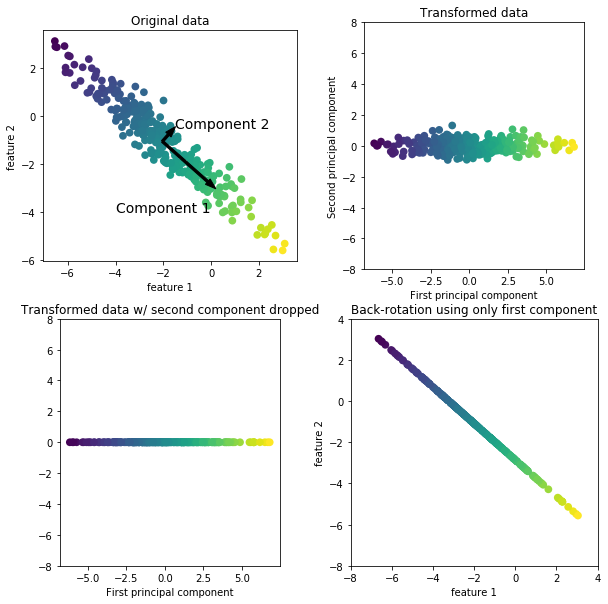

In [125]:
mglearn.plot_pca.plot_pca_illustration()

In [126]:
# PCA (Principal Component Analysis) -> 차원축소 방법이자 가장 유명한 unsupervised learning 방법 
# 차원축소를 하기 위해서 이 데이터의 주경향을 찾고 이를 기준으로 회전시켜야 한다.  
# 오캄의 면도칼 -> 똑같은 성능을 가질 때는 단순한 게 좋다. 

In [154]:
iris = sns.load_dataset('iris')

In [155]:
pca = PCA(2) # 2차원 

In [156]:
t = pca.fit_transform(iris.iloc[:,:-1])

In [176]:
vars(pca) # vars 

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 '_fit_svd_solver': 'full',
 'mean_': array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 'noise_variance_': 0.051022296508184406,
 'n_samples_': 150,
 'n_features_': 4,
 'components_': array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]),
 'n_components_': 2,
 'explained_variance_': array([4.22824171, 0.24267075]),
 'explained_variance_ratio_': array([0.92461872, 0.05306648]),
 'singular_values_': array([25.09996044,  6.01314738])}

In [181]:
vars(pca)['n_features_']

4

In [177]:
vars(gscv)

{'scoring': None, 'estimator': Pipeline(memory=None,
      steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'))]), 'n_jobs': None, 'fit_params': None, 'iid': 'warn', 'refit': True, 'cv': 10, 'verbose': 0, 'pre_dispatch': '2*n_jobs', 'error_score': 'raise-deprecating', 'return_train_score': 'warn', 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]}, 'multimetric_': False}

In [157]:
t.shape # 좌표와 차원이 동시에 변함 

(150, 2)

In [158]:
cross_val_score(KNeighborsClassifier(),t,iris.iloc[:,-1]) # 2차원 

/Users/jung-kyoyoon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98039216, 0.94117647, 0.97916667])

In [159]:
cross_val_score(KNeighborsClassifier(),iris.iloc[:,:-1],iris.iloc[:,-1]) # 4차원 

/Users/jung-kyoyoon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98039216, 0.98039216, 1.        ])

In [161]:
# Feature가 많을수록 예측속도가 느려진다. 
# 예측속도를 빠르게 하기 위해 Feature 를 줄이는 방법 2가지 
# 1. Feature selection
# 2. PCA (차원축소) -> 차원을 줄일 때 예측결과가 더 좋아지는 경우가 있다. (성능 증가)

In [166]:
pipeline_short = make_pipeline(MinMaxScaler(),KNeighborsClassifier())

In [167]:
pipeline_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))]

In [168]:
len(pipeline_short.steps)

2

In [169]:
pipeline_short = make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())

In [170]:
pipeline_short.steps

[('standardscaler-1',
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('standardscaler-2',
  StandardScaler(copy=True, with_mean=True, with_std=True))]

In [171]:
len(pipeline_short.steps)

3

In [172]:
pipeline = [("scaler",MinMaxScaler()),("knn",KNeighborsClassifier())]

In [173]:
param_grid = {'n_neighbors':[x for x in range(1,20)]}

In [183]:
pipeline_short = make_pipeline(MinMaxScaler(),KNeighborsClassifier()) # 이름을 자동적으로 생성 

In [184]:
param_grid = {'logisticregression__C':[0.01,0.1,1,10,100]} # mangling 

In [185]:
class A:
    __a = 3

In [187]:
dir(A) # _A__a => mangling 

['_A__a',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [192]:
pipeline = [("scaler",MinMaxScaler()),("knn",KNeighborsClassifier())]

In [193]:
param_grid = {'n_neighbors__C':[x for x in range(1,20)]} # mangling 

In [196]:
X_train,X_test,y_train,y_test = train_test_split(data_pd.iloc[:,:-1],data_pd.iloc[:,-1])

In [197]:
gscv = GridSearchCV(pipeline, param_grid=param_grid, cv=10)

In [198]:
gscv.fit(X_train,y_train)

TypeError: estimator should be an estimator implementing 'fit' method, [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))] was passed